# AdaBoost Clustering

AdaBoost funktioniert im Konzept ähnlich wie Random Forest. Es werden viele Bäume erzeugt, die dann in einem Council-Verfahren klassifizieren.

Anders als im Random Forest werden hier allerdings die Bäume sehr klein gehalten. Jedoch werden die Bäume nicht zufällig erzeugt sondern basierend auf der Error Rate des vorherigen. Somit soll eine bessere Coverage erreicht werden und

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
iris = sns.load_dataset('iris')
print(iris.head())
iris.describe()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


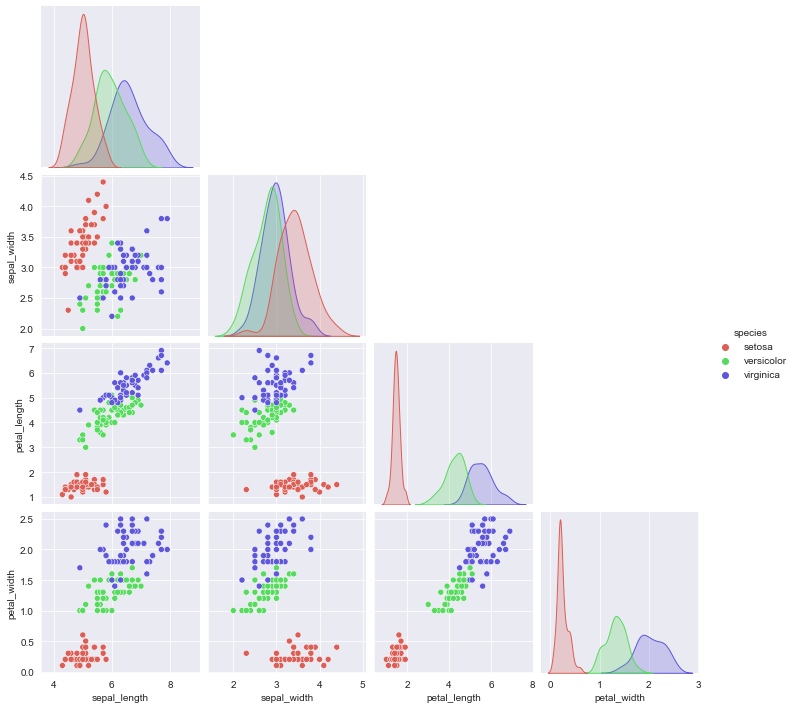

In [8]:
palette = sns.color_palette("hls", 3)
sns.pairplot(iris, hue='species', palette=palette, corner=True)

In [13]:
X = iris.drop('species', axis=1)
enc = LabelEncoder().fit(iris.species)
y = enc.transform(iris.species)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

cb = CatBoostClassifier(random_state=42).fit(X_train, y_train, plot=True)
cb.score(X_test, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.070535
0:	learn: 1.0344838	total: 732us	remaining: 732ms
1:	learn: 0.9607765	total: 1.33ms	remaining: 665ms
2:	learn: 0.8960327	total: 2.01ms	remaining: 668ms
3:	learn: 0.8403744	total: 2.63ms	remaining: 655ms
4:	learn: 0.7886282	total: 3.16ms	remaining: 628ms
5:	learn: 0.7498533	total: 3.7ms	remaining: 612ms
6:	learn: 0.7131168	total: 4.22ms	remaining: 599ms
7:	learn: 0.6758413	total: 4.78ms	remaining: 593ms
8:	learn: 0.6372676	total: 5.48ms	remaining: 604ms
9:	learn: 0.6104798	total: 6ms	remaining: 594ms
10:	learn: 0.5828282	total: 6.55ms	remaining: 589ms
11:	learn: 0.5575893	total: 7.03ms	remaining: 579ms
12:	learn: 0.5302566	total: 7.51ms	remaining: 570ms
13:	learn: 0.5098137	total: 7.97ms	remaining: 561ms
14:	learn: 0.4879047	total: 8.48ms	remaining: 557ms
15:	learn: 0.4677328	total: 9.08ms	remaining: 559ms
16:	learn: 0.4464575	total: 9.54ms	remaining: 551ms
17:	learn: 0.4283716	total: 10ms	remaining: 547ms
18:	learn: 0.4122836	total: 10.5ms	remaining: 541ms

1.0

In [12]:
for name, importance in zip(cb.feature_names_, cb.get_feature_importance()):
    print("{} importance: {:.2%} ".format(name, importance/100))

sepal_length importance: 6.31% 
sepal_width importance: 16.25% 
petal_length importance: 37.76% 
petal_width importance: 39.68% 


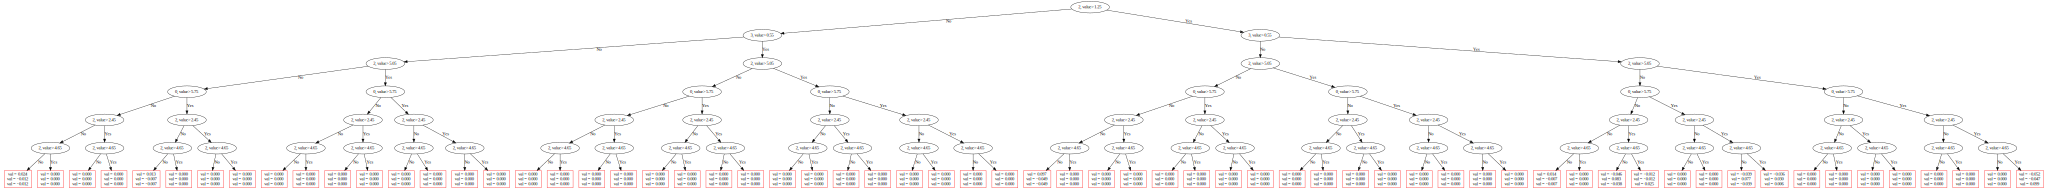

In [17]:
cb.plot_tree(tree_idx=1)

In [18]:
close_data = pd.DataFrame(data={ 'sepal_length': [4.95], 'sepal_width': [3.0], 'petal_length': [1.4], 'petal_width': [0.2], 'species': ['setosa'] })

In [19]:
X_valid = close_data.drop('species', axis=1)

from scipy.spatial import distance

X_leaves = cb.decision_function(X)[0]
valid_leaves = cb.decision_function(X_valid)[0]
distances = [distance.euclidean(valid_leaves, l) for l in X_leaves]
np.argmin(distances)

AttributeError: 'CatBoostClassifier' object has no attribute 'decision_function'